In [122]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import Bio
from scipy.stats import f_oneway
%matplotlib inline

In [123]:
df = pd.read_csv('IGHV1-2_usage.csv')
df.head(5)

,SubjectID,Haplotype,Usage
0,1,2-6,0.106471
1,2,4,0.022486
2,3,2-6,0.075551
3,4,4,0.046183
4,5,4-6,0.059380


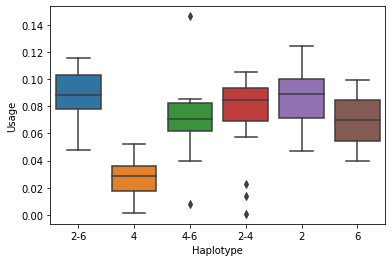

In [124]:
sns.boxplot(x="Haplotype", y="Usage", data=df)
plt.show()

In [125]:
df1 = df.groupby('Haplotype')['Usage'].agg(['mean','count']).reset_index()
df1

,Haplotype,mean,count
0,2,0.086191,17
1,2-4,0.077451,28
2,2-6,0.086956,6
3,4,0.027895,18
4,4-6,0.071032,14
5,6,0.069571,2


In [126]:
data_array = []
for h1 in df1['Haplotype']:
        row = []
        for h2 in df1['Haplotype']:
            a = df[df['Haplotype'] == h1]['Usage']
            b = df[df['Haplotype'] == h2]['Usage']
            F, p = f_oneway(a, b)
            row.append(round(p,4))
        data_array.append(row)

In [127]:
p_df = pd.DataFrame(data = np.array(data_array), 
index = ['2','2-4','2-6','4','4-6','6'], columns = ['2','2-4','2-6','4','4-6','6'])
p_df

,2,2-4,2-6,4,4-6,6
2,1.0000,0.2625,0.9461,0.0000,0.1227,0.3849
2-4,0.2625,1.0000,0.4161,0.0000,0.4756,0.6900
2-6,0.9461,0.4161,1.0000,0.0000,0.2626,0.4737
4,0.0000,0.0000,0.0000,1.0000,0.0000,0.0039
4-6,0.1227,0.4756,0.2626,0.0000,1.0000,0.9508
6,0.3849,0.6900,0.4737,0.0039,0.9508,1.0000


In [128]:
def snp1_state(haplotype):
    if haplotype == '2':
        return 'T'
    elif haplotype == '2-4':
        return 'T'
    elif haplotype == '2-6':
        return 'C/T'
    elif haplotype == '4':
        return 'T'
    elif haplotype == '4-6':
        return 'C/T'
    elif haplotype == '6':
        return 'C'

In [129]:
def snp2_state(haplotype):
    if haplotype == '2':
        return 'A'
    elif haplotype == '2-4':
        return 'A/T'
    elif haplotype == '2-6':
        return 'A'
    elif haplotype == '4':
        return 'T'
    elif haplotype == '4-6':
        return 'A/T'
    elif haplotype == '6':
        return 'A'

In [130]:
df2 = df
df2['SNP1_state'] = df2['Haplotype'].apply(snp1_state)
df2['SNP2_state'] = df2['Haplotype'].apply(snp2_state)
df2.head()

,SubjectID,Haplotype,Usage,SNP1_state,SNP2_state
0,1,2-6,0.106471,C/T,A
1,2,4,0.022486,T,T
2,3,2-6,0.075551,C/T,A
3,4,4,0.046183,T,T
4,5,4-6,0.059380,C/T,A/T


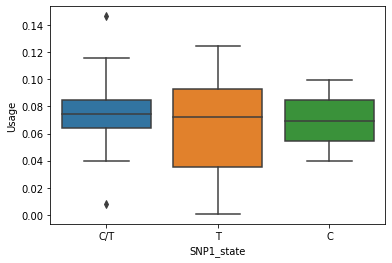

In [131]:
sns.boxplot(x='SNP1_state',y='Usage', data=df2)
plt.show()

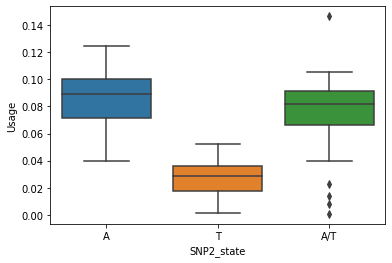

In [132]:
sns.boxplot(x='SNP2_state', y='Usage', data=df2)
plt.show()

In [133]:
df3 = df2.groupby('SNP1_state')['SNP1_state'].agg(['count']).reset_index()
df3['SNP1_state']

0      C
1    C/T
2      T
Name: SNP1_state, dtype: object

In [134]:
df3 = df2.groupby('SNP1_state')['SNP1_state'].agg(['count']).reset_index()
df3['SNP1_state']

SNP1_data_array = []
for s1 in df3['SNP1_state']:
    row = []
    for s2 in df3['SNP1_state']:
        a = df2[df2['SNP1_state'] == s1]['Usage']
        b = df2[df2['SNP1_state'] == s2]['Usage']
        F, p = f_oneway(a,b)
        row.append(round(p,4))
    SNP1_data_array.append(row)
    
p_SNP1 = pd.DataFrame(data = np.array(SNP1_data_array), 
index = df3['SNP1_state'], columns = df3['SNP1_state'])
p_SNP1

SNP1_state,C,C/T,T
SNP1_state,,,
C,1.0000,0.7771,0.8694
C/T,0.7771,1.0000,0.2183
T,0.8694,0.2183,1.0000


In [135]:
df4 = df2.groupby('SNP2_state')['SNP2_state'].agg(['count']).reset_index()
df4['SNP2_state']

0      A
1    A/T
2      T
Name: SNP2_state, dtype: object

In [136]:
SNP2_data_array = []
for s1 in df4['SNP2_state']:
    row = []
    for s2 in df4['SNP2_state']:
        a = df2[df2['SNP2_state'] == s1]['Usage']
        b = df2[df2['SNP2_state'] == s2]['Usage']
        F, p = f_oneway(a,b)
        row.append(round(p,4))
    SNP2_data_array.append(row)
    
p_SNP2 = pd.DataFrame(data = np.array(SNP2_data_array), 
index = df4['SNP2_state'], columns = df4['SNP2_state'])
p_SNP2

SNP2_state,A,A/T,T
SNP2_state,,,
A,1.0000,0.1433,0.0
A/T,0.1433,NaN,0.0
T,0.0000,0.0000,1.0
